## 해외 축구 경기 데이터 기반 승부 예측 프로그램

### 모듈 import

In [21]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

 ### 데이터 불러오기 및 기본값 세팅

In [107]:
df = pd.read_csv("lotte_csv.csv", encoding="EUC_KR")


train_year = (df["YEAR"] <= 2018)
test_year = (df["YEAR"] >= 2019)
interval = 5

In [108]:
df.head(5)

,YEAR,MONTH,DATE,DAY,WDL,R,ER,OP
0,2008,3,29,토,승,11,1,한화
1,2008,3,30,일,승,9,8,한화
2,2008,4,1,화,승,8,4,SK
3,2008,4,2,수,승,6,2,SK
4,2008,4,3,목,패,0,5,SK


In [109]:
def make_data(data):
    x_r = []
    y_r = []
    x_er = []
    y_er = []

    r = list(data["R"])
    er = list(data["ER"])
#     print(np.array(r).shape)
#     print(np.array(er).shape)
    for i in range(len(r)):
        print(data.iloc[i, 0],data.iloc[i-1, 0])
        if i < interval : continue
        elif data.iloc[i, 0] != data.iloc[i-1, 0] :             
            continue
        y_r.append(r[i])
        y_er.append(er[i])

        xa = []
        xb = []
        for p in range(interval):
            d = i + p - interval
            xa.append(r[d])
            xb.append(er[d])
        x_r.append(xa)
        x_er.append(xb)
    return (x_r, y_r, x_er, y_er)
train_x_r , train_y_r, train_x_er, train_y_er = make_data(df[train_year])
test_x_r, test_y_r, test_x_er, test_y_er = make_data(df[test_year])

2008 2018
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008


In [110]:
print(np.array(train_x_r).shape)
print(np.array(train_x_er).shape)
print(np.array(train_y_er).shape)

print("="*10)

print(np.array(test_x_r).shape)
print(np.array(test_y_r).shape)
print(np.array(test_x_er).shape)
print(np.array(test_y_er).shape)

(1476, 5)
(1476, 5)
(1476,)
(139, 5)
(139,)
(139, 5)
(139,)


In [111]:
model1 = RandomForestClassifier()
model2 = RandomForestClassifier()
model1.fit(train_x_r, train_y_r)
model2.fit(train_x_er, train_y_er)

pre_y_r = model1.predict(test_x_r)
pre_y_er = model2.predict(test_x_er)

diff_y_r = abs(pre_y_r-test_y_r)
diff_y_er = abs(pre_y_er-test_y_er)
a = [x for x in diff_y_r if x <= 2]
b = [x for x in diff_y_er if x <= 2]
print("average_r =", sum(diff_y_r)/len(diff_y_r), "max_r =", max(diff_y_r), "score =", len(a)/len(diff_y_r)*100)
print("average_er =", sum(diff_y_er)/len(diff_y_er), "max_er =", max(diff_y_er), "score =", len(b)/len(diff_y_er)*100)

wdl = []
for i in range(len(pre_y_r)):
    if abs(pre_y_r[i]-pre_y_er[i]) == 0 :
        wdl.append("무")
    elif pre_y_r[i] > pre_y_er[i] :
        wdl.append("승")
    else :
        wdl.append("패")

data = df[test_year]
test_wdl = list(data["WDL"])
y = 0
for i in range(len(wdl)):
    if wdl[i] == test_wdl[i]:
        y += 1

print("승패 정확도 :", y/len(wdl)*100)

average_r = 3.1870503597122304 max_r = 12 score = 48.92086330935252
average_er = 3.446043165467626 max_er = 14 score = 48.201438848920866
승패 정확도 : 48.92086330935252


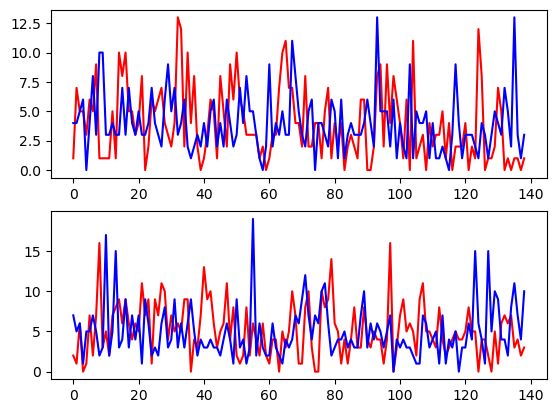

In [112]:
plt.subplot(2, 1, 1)
plt.plot(test_y_r, c='r')
plt.plot(pre_y_r, c='b')

plt.subplot(2,1,2)
plt.plot(test_y_er, c='r')
plt.plot(pre_y_er, c='b')
plt.show()

## MY

---

In [134]:
df= pd.read_csv("Tottenham.csv", encoding="cp949")

train_year = (df["YEAR"] <= 2020)
test_year = (df["YEAR"] >= 2021)
interval = 5



In [135]:
df.head(5)

,YEAR,TEAM,MONTH,DATE,DAY,WDR,R,ER,OP
0,2011,토트넘,8,23,화,패,0,3,맨유
1,2011,토트넘,8,28,일,패,1,5,맨시티
2,2011,토트넘,9,10,토,승,2,0,울버햄튼
3,2011,토트넘,9,18,일,승,4,0,리버풀
4,2011,토트넘,9,24,토,승,2,1,위건


In [136]:
def make_data(data):
    x_r = []
    y_r = []
    x_er = []
    y_er = []

    r = list(data["R"])
    er = list(data["ER"])

    for i in range(len(r)):
        print(data.iloc[i, 0],data.iloc[i-1, 0])
        if i < interval : continue
        elif data.iloc[i, 0] != data.iloc[i-1, 0] :             
            continue
        y_r.append(r[i])
        y_er.append(er[i])

        xa = []
        xb = []
        for p in range(interval):
            d = i + p - interval
            xa.append(r[d])
            xb.append(er[d])
        x_r.append(xa)
        x_er.append(xb)
    return (x_r, y_r, x_er, y_er)
train_x_r , train_y_r, train_x_er, train_y_er = make_data(df[train_year])
test_x_r, test_y_r, test_x_er, test_y_er = make_data(df[test_year])

2011 2020
2011 2011
2011 2011
2011 2011
2011 2011
2011 2011
2011 2011
2011 2011
2011 2011
2011 2011
2011 2011
2011 2011
2011 2011
2011 2011
2011 2011
2011 2011
2011 2011
2012 2011
2012 2012
2012 2012
2012 2012
2012 2012
2012 2012
2012 2012
2012 2012
2012 2012
2012 2012
2012 2012
2012 2012
2012 2012
2012 2012
2012 2012
2012 2012
2012 2012
2012 2012
2012 2012
2012 2012
2012 2012
2012 2012
2012 2012
2012 2012
2012 2012
2012 2012
2012 2012
2012 2012
2012 2012
2012 2012
2012 2012
2012 2012
2012 2012
2012 2012
2012 2012
2012 2012
2012 2012
2012 2012
2012 2012
2012 2012
2012 2012
2013 2012
2013 2013
2013 2013
2013 2013
2013 2013
2013 2013
2013 2013
2013 2013
2013 2013
2013 2013
2013 2013
2013 2013
2013 2013
2013 2013
2013 2013
2013 2013
2013 2013
2013 2013
2013 2013
2013 2013
2013 2013
2013 2013
2013 2013
2013 2013
2013 2013
2013 2013
2013 2013
2013 2013
2013 2013
2013 2013
2013 2013
2013 2013
2013 2013
2013 2013
2013 2013
2013 2013
2013 2013
2014 2013
2014 2014
2014 2014
2014 2014
2014 2014


In [137]:
print(np.array(train_x_r).shape)
print(np.array(train_x_er).shape)
print(np.array(train_y_er).shape)

print("="*10)

print(np.array(test_x_r).shape)
print(np.array(test_y_r).shape)
print(np.array(test_x_er).shape)
print(np.array(test_y_er).shape)

(343, 5)
(343, 5)
(343,)
(55, 5)
(55,)
(55, 5)
(55,)


In [138]:
model1 = RandomForestClassifier()
model2 = RandomForestClassifier()
model1.fit(train_x_r, train_y_r)
model2.fit(train_x_er, train_y_er)

pre_y_r = model1.predict(test_x_r)
pre_y_er = model2.predict(test_x_er)

diff_y_r = abs(pre_y_r-test_y_r)
diff_y_er = abs(pre_y_er-test_y_er)
a = [x for x in diff_y_r if x <= 2]
b = [x for x in diff_y_er if x <= 2]
print("average_r =", sum(diff_y_r)/len(diff_y_r), "max_r =", max(diff_y_r), "score =", len(a)/len(diff_y_r)*100)
print("average_er =", sum(diff_y_er)/len(diff_y_er), "max_er =", max(diff_y_er), "score =", len(b)/len(diff_y_er)*100)

wdl = []
for i in range(len(pre_y_r)):
    if abs(pre_y_r[i]-pre_y_er[i]) == 0 :
        wdl.append("무")
    elif pre_y_r[i] > pre_y_er[i] :
        wdl.append("승")
    else :
        wdl.append("패")

data = df[test_year]
test_wdl = list(data["WDR"])
y = 0
for i in range(len(wdl)):
    if wdl[i] == test_wdl[i]:
        y += 1

print("승패 정확도 :", y/len(wdl)*100)

average_r = 1.490909090909091 max_r = 5 score = 80.0
average_er = 1.1272727272727272 max_er = 4 score = 92.72727272727272
승패 정확도 : 41.81818181818181


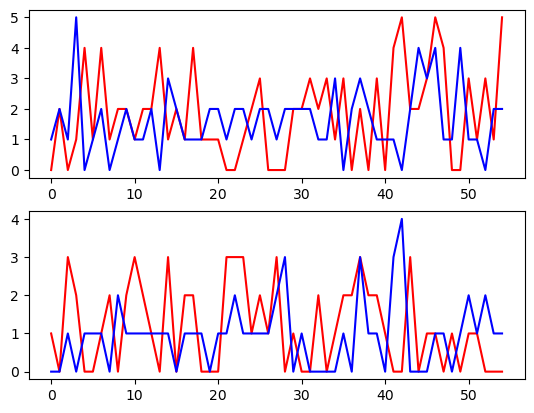

In [139]:
plt.subplot(2, 1, 1)
plt.plot(test_y_r, c='r')
plt.plot(pre_y_r, c='b')

plt.subplot(2,1,2)
plt.plot(test_y_er, c='r')
plt.plot(pre_y_er, c='b')
plt.show()

In [140]:
df

,YEAR,TEAM,MONTH,DATE,DAY,WDR,R,ER,OP
0,2011,토트넘,8,23,화,패,0,3,맨유
1,2011,토트넘,8,28,일,패,1,5,맨시티
2,2011,토트넘,9,10,토,승,2,0,울버햄튼
3,2011,토트넘,9,18,일,승,4,0,리버풀
4,2011,토트넘,9,24,토,승,2,1,위건
...,...,...,...,...,...,...,...,...,...
413,2022,토트넘,5,1,일,승,3,1,레스터
414,2022,토트넘,5,8,일,무,1,1,리버풀
415,2022,토트넘,5,13,금,승,3,0,아스널
416,2022,토트넘,5,15,일,승,1,0,번리
